# Principles of Data Science

### Lecture 13: Test statistics and the method of moments

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Test statistics and the method of moments

- Today's lecture covers 

    - Test statistics
    - The method of moments
    
- This is a short lecture to build in some buffer space for the previous 3 very packed lectures

- Learning objectives:
   - Know what a test statistic is and how to use it
   - Understand and be able to produce Method of Moments estimates

## Recap

- We have previously seen estimation via maximum likelihood and least-squares
- An important application of these is not just in point estimates of parameters (central values) but also estimates of the uncertainty on those estimates


## Test statistics

- A *test statistic* (sometimes just *statistic*) is some function of the estimated parameters

$$ T = f(\hat{\theta})$$

- Ideally it is informative

- But it can be anything you want
    - e.g. if determinining heights in this class could use the minutes since birth 
    - this would not be a very useful test statistic
    
- Particularly useful when trying to distinguish between hypothesis (as we will see later)

- For now just remember that a particualrly powerful test-statistics is the LLR

$$ T = \ln \left( \frac{ L_1(\hat{\theta}) }{L_2(\hat{\theta})} \right) $$

## The method of moments

- We have now seen ML and least-squares estimates
- These have close to optimal properties
    - particularly for large $N$
- Sometimes, however, they are hard to implement
    - computing resources
    - difficulty differentiating the likelihood
    
- The method of moments (MoM) provides an alternative

## The law of large numbers

- MoM is entirely based on the fact that sample estiamtes of the moments tend to the true moments for large $N$
- Recall this is the *law of large numbers*
- For the mean:

$$ \bar{X} = \frac{1}{N} \sum_{i=1}^N X_i \to \;\; \mu \;\;\; \text{ as } \;\;\; N\to\infty $$

- For any moment about zero:

$$ \hat{\mu}_\alpha = \frac{1}{N} \sum_{i=1}^N X_i^\alpha   \to \;\; \mu_\alpha \;\;\; \text{ as } \;\;\; N\to\infty $$

- For any moment about the mean

$$ \hat{\mu}'_{\alpha} = \frac{1}{N} \sum_{i=1}^N (X_i - \bar{X})^\alpha  \to \;\; \mu_\alpha \;\;\; \text{ as } \;\;\; N\to\infty $$ 


## Method of Moments demonstration

- <font color="green">*See hand written notes in lectures*</font>
- example for normal distribution
    - gives unbiased and consistent estimate (as efficient as ML or least-sqaures)
- example for for angular distribution of $\mu^- \to e^- \nu_e \bar{\nu}_{\mu}$ decays 
    - if any moment is zero just move on to the next one
    - or use the moment about the mean

# <font color="darkred">*Musical interlude...*</font>

## Some MoM examples

- First the very easy normal distribution example
    - $\mu = \theta_1 = \mu_1$
    - $\sigma = \theta_2 = \sqrt{\mu_2 - \mu_1^2} $

In [1]:
import numpy as np
import scipy as sp
from iminuit import Minuit, cost

x = np.random.normal(2 ,4, size=2000)

# MoM

# function to compute mean from moments
def mu(m1, m2):
    return m1

# function to compute sigma from moments
def sg(m1, m2):
    return np.sqrt( m2 - m1**2 )

# compute 1st and 2nd central moments from sample
m1_hat = sp.stats.moment(x, moment=1, center=0)
m2_hat = sp.stats.moment(x, moment=2, center=0)

# propagate to estimates of mu and sg
mu_hat = mu(m1_hat, m2_hat)
sg_hat = sg(m1_hat, m2_hat)

# and do a minuit fit
def model(x, mu, sg):
    return sp.stats.norm.pdf(x, mu, sg)

nll = cost.UnbinnedNLL(x, model )
mi  = Minuit(nll, mu=1, sg=3)
mi.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.126e+04                  │              Nfcn = 46               │
│ EDM = 2.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   2.02    │   0.09    │            │            │         │         │       │
│ 1 │ sg   │   4.04    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │  0.00816 4.46e-06 │
│ sg │ 4.46e-06  0.00408 │
└────┴───────────────────┘

In [2]:
print('MLE:', *mi.values )
print('MOM:', mu_hat, sg_hat)

print(mi.covariance)

MLE: 2.0235362762768005 4.039245378125887
MOM: 2.0236652170943334 4.03920710804216
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │  0.00816 4.46e-06 │
│ sg │ 4.46e-06  0.00408 │
└────┴───────────────────┘


## What about uncertainties from MoM estimates?

- Recall from earlier in the lectures how we estimate the covariance between two sample estimates (with Bessel correction)
- This gives a sample estimate of the covariance on the estimates, $\hat{\mu}$:

$$ \widehat{\text{cov}}(\hat{\mu}_\alpha, \hat{\mu}_\beta) = \frac{1}{n(n-1)} \sum_{i=1}^N (X_i^\alpha - \overline{X^\alpha}_i)(X^\beta_i - \overline{X^\beta}_i) $$

- Can then propagate this covariance to the $\hat{\theta}$ as we have functions of $\theta$ in terms of $\mu$:

$$ \text{cov}(\theta_i,\theta_j) = \sum_{k,l} \frac{\partial \theta_i}{\partial \mu_k}\frac{\partial \theta_j}{\partial\mu_l} \text{cov}(\mu_k, \mu_l) $$

- For this example I exploit the [`jacobi`](https://hdembinski.github.io/jacobi/) python package for error propagation

In [3]:
## covariance of moment estimates
N = len(x)

x1_bar = np.mean(x)
x2_bar = np.mean(x**2)

cov_x11 = 1/(N*(N-1)) * np.sum( (x-x1_bar) * ( x - x1_bar) )
cov_x12 = 1/(N*(N-1)) * np.sum( (x-x1_bar) * ( x**2 - x2_bar) )
cov_x22 = 1/(N*(N-1)) * np.sum( (x**2-x2_bar) * ( x**2 - x2_bar) )

cov_mus_hat = np.array( [ [cov_x11, cov_x12], [ cov_x12, cov_x22] ] )


In [4]:
# propagate to parameter estimates

from jacobi import propagate

# jacobi needs a single wrapped function
theta = lambda p: np.array([ mu(*p), sg(*p) ])

mom, mom_cov = propagate( theta, [m1_hat, m2_hat], cov_mus_hat)

## Comparison with MLE

- Differences are just in the computation numerics

In [5]:
print('MLE:', *mi.values)
print('MoM:', *mom)

print('MLE_err:', *mi.errors)
print('MoM_err:', *np.sqrt(np.diag(mom_cov)))

print('MLE_cov:')
print(mi.covariance)

print('MoM_cov:')
print(mom_cov)

MLE: 2.0235362762768005 4.039245378125887
MoM: 2.0236652170943334 4.03920710804216
MLE_err: 0.09032029945228127 0.06386695548065455
MoM_err: 0.09034200501297299 0.06388671459541279
MLE_cov:
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │  0.00816 4.46e-06 │
│ sg │ 4.46e-06  0.00408 │
└────┴───────────────────┘
MoM_cov:
[[0.00816168 0.00024794]
 [0.00024794 0.00408151]]


## An MoM example for you

- You can have a go at this one
- probability distribution is

$$ f(X;\alpha, \beta) = N [ 1 + \alpha x + \beta x^2 ] \;\; \text{ for }  a < x < b $$

- the details are in Problem Sheet 3


In [6]:
# accept-reject
xrange = (-3, 3)
true_alpha = 1.3
true_beta = 2.4

# norm terms for pdf
d1 = xrange[1] - xrange[0]
d2 = (xrange[1]**2 -xrange[0]**2)/2 
d3 = (xrange[1]**3 -xrange[0]**3)/3 

def pdf(x, alpha, beta):
    
    return (1 + alpha*x + beta*x**2) / (d1 + alpha*d2 + beta*d3)

# find max pdf
from scipy.optimize import minimize
truef = lambda x: -pdf(x, true_alpha, true_beta)
x = minimize(truef, x0=[0], bounds=[xrange])
maxy = -truef(x.x[0])

def gen(size=1):
    evs = []
    while len(evs)<size:
        # gen [-pi,pi]
        x = np.random.uniform(*xrange)
        # gen [0,maxy]
        y = np.random.uniform(0,maxy)
        # eval pdf
        p = pdf(x, true_alpha, true_beta)
        # accept-reject
        if y<p:
            evs.append(x)
    if size==1:
        return evs[0]
    else:
        return np.array(evs)


In [7]:
# gen sample
x_i = gen(size=10000)

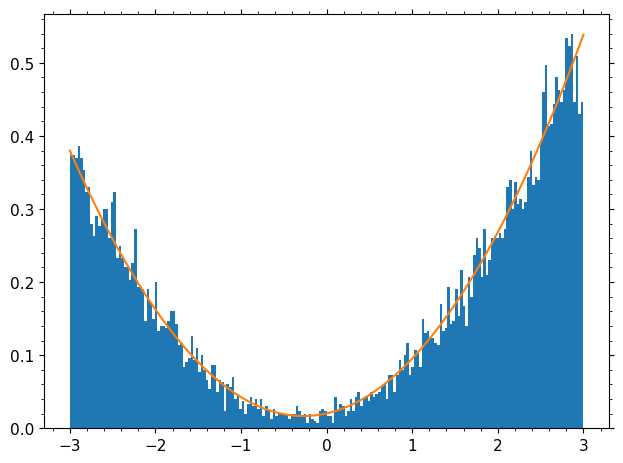

In [8]:
# check it looks ok
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')
plt.hist(x_i, density=True, bins=200)
x = np.linspace(*xrange,100)
plt.plot(x, pdf(x, true_alpha, true_beta))

<font color="red">**You will need to finish off this example...**</font>

# End of Lecture 13

By the end of this lecture you should:
   - Know what a test statistic is and how to use it
   - Understand and be able to produce Method of Moments estimates